In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import os
#os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]=".50"
#os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"]="platform"


import tinygp
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)


multi_kernel = tinygp.kernels.ExpSquared(scale=1.5) * tinygp.kernels.ExpSineSquared(
    scale=2.5, gamma=0.5
)
trained_kernel =  tinygp.kernels.ExpSquared(scale=1.5)

In [2]:
random = np.random.default_rng(5678)
t1 = np.sort(random.uniform(0, 10, 200))
label1 = np.zeros_like(t1, dtype=int)
t2 = np.sort(random.uniform(0, 10, 300))
label2 = np.ones_like(t2, dtype=int)
X = (np.append(t1, t2), np.append(label1, label2))

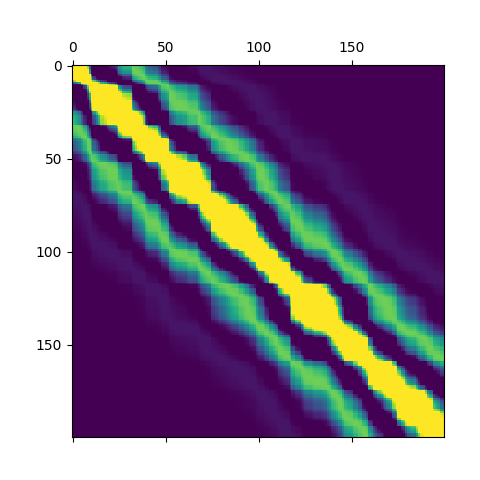

In [9]:
oldK_matrix = (tinygp.kernels.ExpSquared(scale=1.5) * (tinygp.kernels.ExpSineSquared(scale=2.5, gamma=0.5) + tinygp.kernels.Cosine(scale= 4.0/2.)))(t1, t1)
plt.matshow(oldK_matrix, vmin=0.0, vmax=1.0)


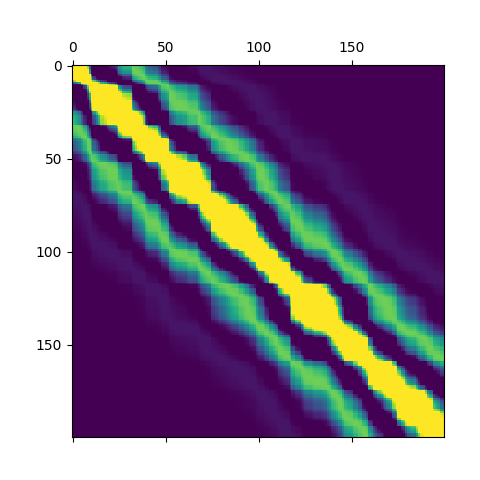

In [11]:
newK_matrix = (tinygp.kernels.ExpSquared(scale=1.5) * tinygp.kernels.ExpSineSquared(scale=2.5, gamma=0.5) +  tinygp.kernels.ExpSquared(scale=1.5) * tinygp.kernels.Cosine(scale= 4.0/2.))(t1, t1)
plt.matshow(newK_matrix, vmin=0.0, vmax=1.0)
